# **Eploratory Data Analysis**  
> 📈 **Visualizing**
+ In this notebook, we'll visually analyse and explore the data

## Load and clean the data
> The first step is always to load the dataset

In [ ]:
# import pandas, matplotlib, seaborn
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# specify stylesheet
plt.style.use('fast')

In [ ]:
# load the dataset into a pandas DataFrame object
crops = pd.read_csv('/content/crop_yields.csv')

# dataset info
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
# re-arrange the columns to have the Production column at the end
crop_cols = crops.columns.to_list()
crop_cols.pop(crops.columns.get_loc('Production'))
crop_cols.append('Production')
crops = crops[crop_cols]

### Drop unnecessary columns
> Drop `Crop_Year` & `Yield` columns
+ We'll do this using the [`DataFrame.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas-dataframe-drop) method

In [ ]:
# drop the Crop_Year & Production columns
crops.drop(columns=['Crop_Year', 'Yield'], inplace=True)

In [ ]:
# confirm new dataframe
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Season           19689 non-null  object 
 2   State            19689 non-null  object 
 3   Area             19689 non-null  float64
 4   Annual_Rainfall  19689 non-null  float64
 5   Fertilizer       19689 non-null  float64
 6   Pesticide        19689 non-null  float64
 7   Production       19689 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


### Numeric & categorical columns
> Distinguish _numeric_ & _categorical_ columns
+ Use [`DataFrame.select_dtypes()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to return a subset of the DataFrame’s columns based on the column dtypes
+ Then return the column names and turn those into a `list`
+ Here, [`DataFrame.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) is used to select all rows, from column `0` to second-last

In [ ]:
# numeric
num_cols = crops.iloc[:, 0 :-1].select_dtypes(include='number')\
                              .columns.to_list()
num_cols

['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

In [ ]:
# categorical
cat_cols = crops.select_dtypes(include='object').columns.to_list()
cat_cols

['Crop', 'Season', 'State']

In [ ]:
# remove leading & trailing whitespaces from categorical values
for col in cat_cols:
  crops[col] = crops[col].apply(lambda x: x.strip())

### Filter out unwanted rows (based on categorical features)
> 💡 **Info**

> Recall, that all [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) columns can be accessed as [`pandas.Series`](https://pandas.pydata.org/docs/reference/series.html) objects
+ [`pandas.Series.nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html) - Returns number of unique elements in the _column_
+ [`pandas.Series.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) - Returns unique values in the _column_

In [ ]:
# loop through each categorical feature
for col in cat_cols:
  print(f'No. of {col}s: {crops[col].nunique()}')
  print(f'Unique {col}s:\n{crops[col].unique()}\n\n-------------------\n')

No. of Crops: 55
Unique Crops:
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']

-------------------

No. of Seasons: 6
Unique Seasons:
['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']

-------------------

No. of States: 30
Unique States:
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 

> 👀 **Observation**

> The `Season` & `State` columns are okay, but the `Crop` column has crops that have been _grouped_. In particular, these are `other oilseeds`, `Other Cereals`, `Oilseeds total`, `Rapeseed &Mustard`, `Other Summer Pulses`, `Other Kharif pulses`, `Peas & beans (Pulses)`, & `Other  Rabi pulses`

> Since we want out model to make predictions from distinct crop types and not _grouped_ crops, we'll filter out these rows
+ To achieve, this we'll use the [`Series.isin(values)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) which returns a boolean `Series` mask showing whether each element in the `Series` (column in this case) matches an element in the passed sequence of `values` exactly
+ We can then invert the mask using the squiggley sign, `~` to filter out those specific rows
+ Not that it has any effect, but I'll reorder the `index` of the final `DataFrame` using [`DataFrame.reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

In [ ]:
# list containing grouped crop names
grouped_crops = ['other oilseeds', 'Other Cereals', 'Oilseeds total',
                 'Rapeseed &Mustard','Other Summer Pulses', 'Other Kharif pulses',
                 'Peas & beans (Pulses)', 'Other  Rabi pulses']

# mask to select rows that have any of the grouped crop names
mask = crops['Crop'].isin(grouped_crops)

# filter those rows out (using ~ before the mask)
crops = crops[~mask].reset_index(drop=True)

### Check for `Null` values
> The dataset doesn't seem to have null values, but we can still check
+ The [`DataFrame.isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull) return a boolean same-sized object indicating if the values are NA
+ The `sum()` method sums all `Null` instances per column and returns a summary

In [ ]:
# check for null values per column
crops.isnull().sum().to_dict()

{'Crop': 0,
 'Season': 0,
 'State': 0,
 'Area': 0,
 'Annual_Rainfall': 0,
 'Fertilizer': 0,
 'Pesticide': 0,
 'Production': 0}

> 📈 **Observation**

> Zero `Null` values in the columns. So we're good.

### Descriptive statistics of _numeric_ columns
+ Generate a summary of dataset's descriptive statistics of _numerical_ columns using [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method
+ Descriptive statistics include summary of central tendency, dispersion and shape of a dataset’s distribution

In [ ]:
# generate a summary of dataset's descriptive statistics
crops.describe()

,Area,Annual_Rainfall,Fertilizer,Pesticide,Production
count,1.774400e+04,17744.000000,1.774400e+04,1.774400e+04,1.774400e+04
mean,1.929137e+05,1431.235127,2.585318e+07,5.235266e+04,1.823004e+07
std,7.689429e+05,818.736692,9.960883e+07,2.238537e+05,2.770414e+08
min,5.000000e-01,301.300000,5.417000e+01,9.000000e-02,0.000000e+00
25%,1.418000e+03,933.200000,1.908392e+05,3.625350e+02,1.499500e+03
50%,1.007400e+04,1238.500000,1.334368e+06,2.599375e+03,1.649750e+04
75%,8.321825e+04,1632.400000,1.094877e+07,2.174731e+04,1.412665e+05
max,5.080810e+07,6552.700000,4.835407e+09,1.575051e+07,6.326000e+09


In [ ]:
# one last look at the final dataframe info
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17744 entries, 0 to 17743
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             17744 non-null  object 
 1   Season           17744 non-null  object 
 2   State            17744 non-null  object 
 3   Area             17744 non-null  float64
 4   Annual_Rainfall  17744 non-null  float64
 5   Fertilizer       17744 non-null  float64
 6   Pesticide        17744 non-null  float64
 7   Production       17744 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


> 💡 **So far**  
+ The dataset has `17744` rows and `8` columns, and has no missing values
+ _Categorical_ features are `Crop`, `Season`and `State` whereas numeric columns are `Area`	`Annual_Rainfall`	`Fertilizer` and `Pesticide`

## Label Analysis


> ✋ **Disclaimer**  

> I tried plotting graphs of _numeric features_ with original dataset without removing outliers, and it was a mess.
+ Here's a helper function we'll be using to return a `DataFrame` with outliers for a particular _numeric_ column removed

In [ ]:
# define function to filter out outliers
def remove_outliers(dataframe, column):
  # make copy of dataframe
  df = dataframe.copy()

  # define lower and upper bounds
  lower_bound = df[str(column)].quantile(0.05)
  upper_bound = df[str(column)].quantile(0.95)

  # mask to filter out column values that fall between bounds
  mask = (df[str(column)] >= lower_bound) & (df[str(column)] <= upper_bound)

  # return filterd dataset
  return df[mask]

### Plot label distribution
> We'll use [`seaborn`](https://seaborn.pydata.org/index.html) [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) and [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to visualize `Production` distribution

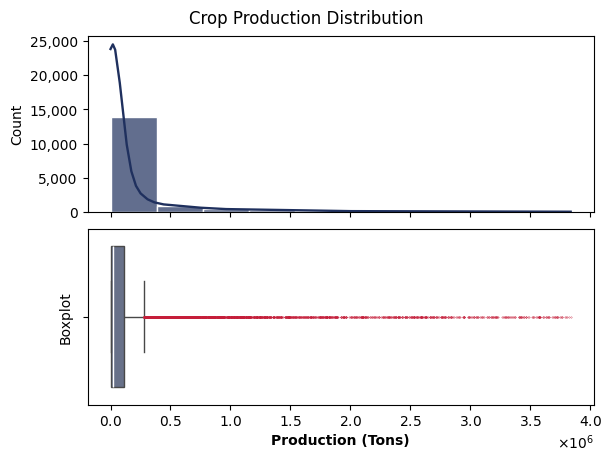

In [ ]:
# specify subplot (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True,
                        layout='constrained')

# histotram
sns.histplot(data=remove_outliers(crops, 'Production'), x='Production',
             bins=10, kde=True, edgecolor='#ffffff', color='#1f305e',
             line_kws={'linewidth':1.7}, alpha=0.7,
             ax=axs[0])

# boxplot
sns.boxplot(data=remove_outliers(crops,'Production'), x='Production',
            color='#626e8e', linewidth=1.0,
            flierprops={'marker':'.', 'markeredgecolor':'#c51e3a',
                        'markersize':0.5},
            medianprops={'color':'#ffffff'})

# format ylabel ticks to have commas after 10^n
axs[0].yaxis.set_major_formatter(matplotlib.ticker\
                  .FuncFormatter(lambda x, p: format(int(x), ',')))
# format xaxis ticks to have 10^a format
axs[0].ticklabel_format(axis='x', style='sci', scilimits=(0, 3),
                        useMathText=True)

# axis labels
axs[1].set_ylabel('Boxplot')
axs[1].set_xlabel('Production (Tons)', weight='black')

# suptitle
fig.suptitle('Crop Production Distribution')
plt.show()

In [ ]:
# get mean & median
print('Production Median: ', remove_outliers(crops, 'Production')['Production'].median())
print('Production: ', remove_outliers(crops, 'Production')['Production'].mean())

Production Median:  16458.0
Production:  195555.46676680437


> 📈 **Insight**  

> The distribution of the `Production` is _right-skewed_ meaning that majority of the data points (and hence `mean` & `median`) are concentrated on the lower end, and that there are higher values that are less frequent and beyond the typical range of most of the data (_outliers_) on the higher end.

## Feature Analysis
> Here, we'll visualize the following
+ Numeric features distribution
+ Categorical features distribution
+ Relationship between features and label

### Numeric features distribution
> To visualize distribution of each numeric column, we'll plot a [`seaborn`](https://seaborn.pydata.org/index.html) [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) and [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

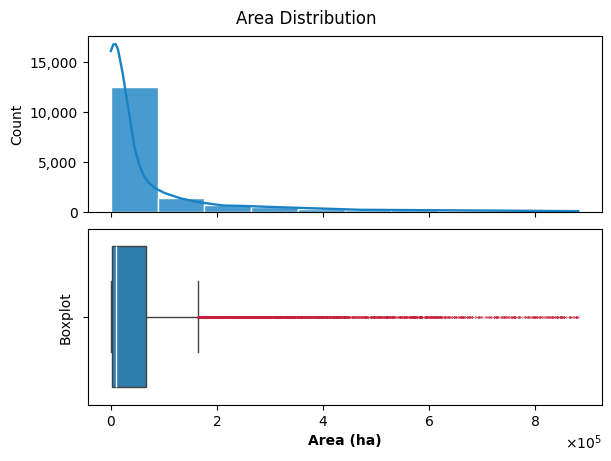

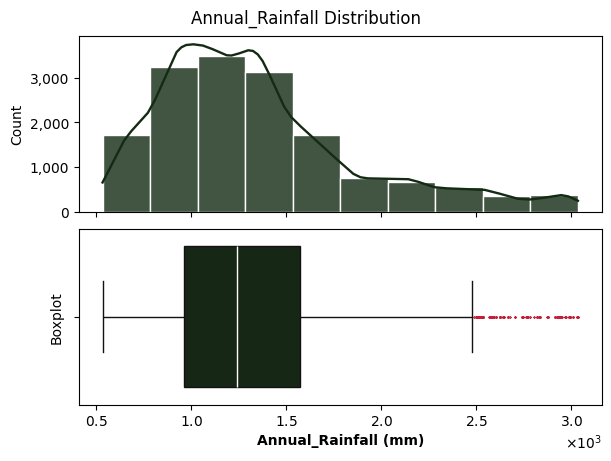

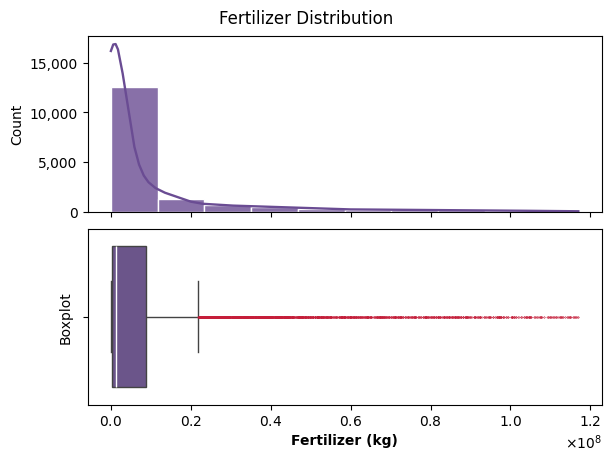

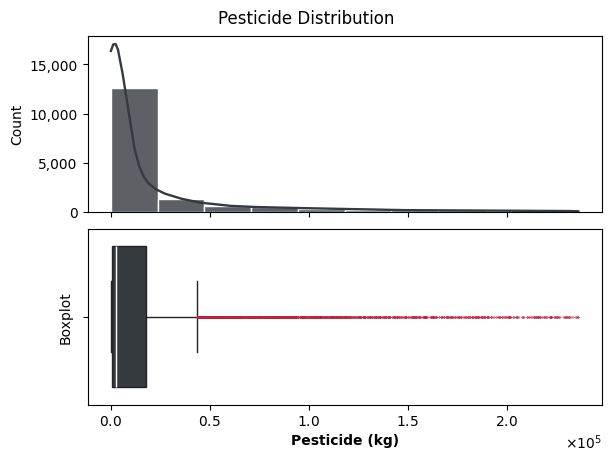

In [ ]:
#       ['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
units = ['(ha)', '(mm)', '(kg)', '(kg)']
colors = ['#1982c4', '#132a13', '#6a4c93', '#343a40']

for i, col in enumerate(num_cols):
  # specify subplot (2 rows, 1 column)
  fig, axs = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True,
                          layout='constrained')

  # histotram
  #sns.histplot(data=remove_outliers(crops, col), x=col,
  sns.histplot(data=remove_outliers(crops, col), x=col,
              bins=10, kde=True, edgecolor='#ffffff', color=colors[i],
              line_kws={'linewidth':1.7}, alpha=0.8,
              ax=axs[0])

  # boxplot
  #sns.boxplot(data=remove_outliers(crops,col), x=col,
  sns.boxplot(data=remove_outliers(crops,col), x=col,
              color=colors[i], linewidth=1.0,
              flierprops={'marker':'.', 'markeredgecolor':'#c51e3a',
                          'markersize':0.5},
              medianprops={'color':'#ffffff'})

  # format xlabel ticks to have commas after 10^n
  axs[0].ticklabel_format(style='sci', scilimits=(0, 3,),
                          axis='x', useMathText=True)
  # format ylabel ticks to have commas after 10^n
  axs[0].yaxis.set_major_formatter(matplotlib.ticker\
                  .FuncFormatter(lambda x, p: format(int(x), ',')))
  # axis labels
  axs[1].set_ylabel('Boxplot')
  axs[1].set_xlabel(f'{col} {units[i]}', weight='black')

  # suptitle
  fig.suptitle(f'{col} Distribution')
  plt.show()
  print('\n')

> 📈 **Insight**  

> Except for the `Annual_Rainfall` feature, the rest of the numeric features are _right-skewed_ meaning that majority of the data points (and hence `mean` & `median`) are concentrated on the lower end, and that there are higher values that are less frequent and beyond the typical range of most of the data (_outliers_) on the higher end. This was the same distribution observed for the `Production` column

> ⚡ **Pro-tip**

> Tree-based models are more robust to non-normally distributed features. That said, we'll be training an [`XGBRegressor`](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) model in the subsequent notebook

### Categorical features distribution
> To visualize distribution of each categorical column, we'll plot a [`seaborn`](https://seaborn.pydata.org/index.html) [`count`](https://seaborn.pydata.org/generated/seaborn.countplot.html)
+ Since there's no outliers for _categorical features_, we'll revert to using the original dataset

#### View unique values for each categorical feature
+ [`pandas.Series.nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html) - Returns number of unique elements in the _column_
+ [`pandas.Series.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) - Returns unique values in the _column_

In [ ]:
# loop through each categorical feature
for col in cat_cols:
  print(f'No. of Distinct {col}s: {crops[col].nunique()}')
  print(f'Unique {col}s:\n{crops[col].unique()}\n\n-------------------')

No. of Distinct Crops: 47
Unique Crops:
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Potato' 'Rice' 'Sesamum' 'Small millets' 'Sugarcane'
 'Sweet potato' 'Tapioca' 'Tobacco' 'Turmeric' 'Wheat' 'Bajra'
 'Black pepper' 'Cardamom' 'Coriander' 'Garlic' 'Ginger' 'Groundnut'
 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana' 'Soyabean' 'Barley'
 'Khesari' 'Masoor' 'Moong(Green Gram)' 'Safflower' 'Sannhamp' 'Sunflower'
 'Urad' 'Cowpea(Lobia)' 'Guar seed' 'Moth']

-------------------

No. of Distinct Seasons: 6
Unique Seasons:
['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']

-------------------

No. of Distinct States: 30
Unique States:
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhat

#### Plot distribution
> We'll use a [`seaborn`](https://seaborn.pydata.org/index.html) [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) to visualize frequency of unique values for each _categorical_ column


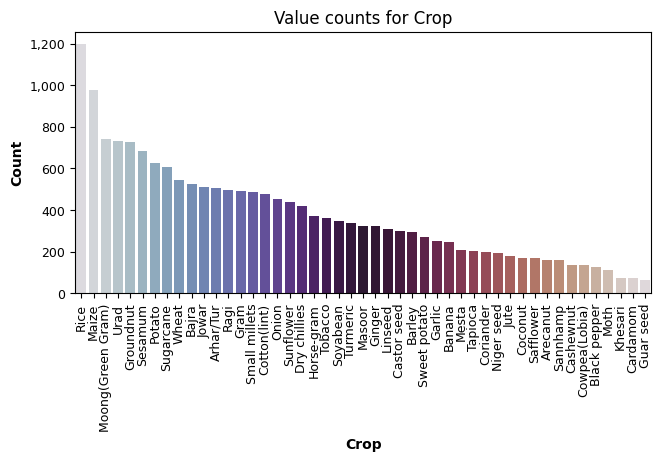

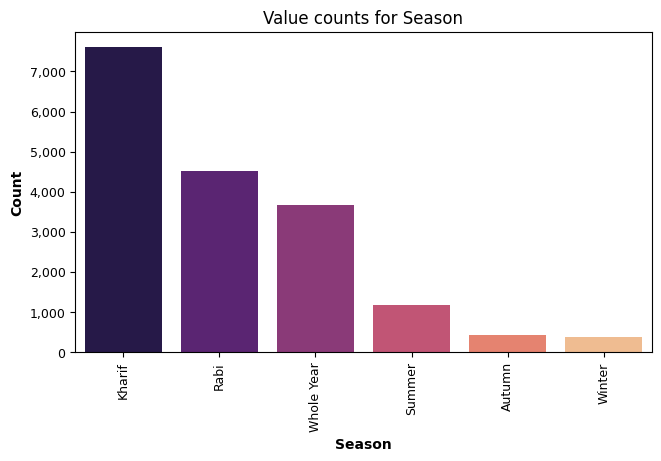

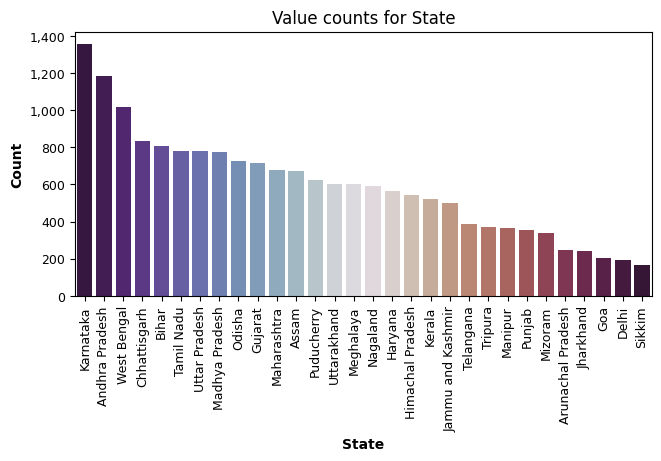

In [ ]:
#       ['Crop', 'Season', 'State']
palettes = ['twilight', 'magma', 'twilight_shifted']

# loop through categorical features
for i, col in enumerate(cat_cols):
  # specify figure and Axes
  _, ax = plt.subplots(figsize=(6.5,4.5), layout='constrained')

  # convert value_counts() Series into DataFrame
  df = pd.DataFrame(crops[col].value_counts().sort_values(ascending=False))

  # make plot
  sns.barplot(data=df, y=df.iloc[:, 0], hue=df.index, x=df.index,
              palette=palettes[i], ax=ax)

  # format yticks to have a comma after 10^3
  ax.yaxis.set_major_formatter(matplotlib.\
                      ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

  # axis ticks, labels & title
  ax.tick_params(axis='both', labelsize=9)
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_ylabel('Count', weight='black')
  ax.set_xlabel(f'{col}', weight='black')
  ax.set_title(f'Value counts for {col}')

  plt.show()
  print('\n')

> 📈 **Insight**

> Values within _categorical features_ `State`, `Crop`, `Season` appear varying number of times, which indicates that they could be predictive of `Production`

### Relationship between features and label
> Here we'll analyse
+ How numeric features relate to the target
+ How categorical features relate to the target

#### Numeric features & target
> _Correlation_ is a way to tell if a numeric feature holds any predictive power on a numeric target. The [`DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method is used to compute pairwise correlation of columns.   

> Correlation coefficient is measured on a scale of `-1` to `+1`
+ `0.0` to `0.3` / `0.0` to `-0.3` : Weak or NO linear relationship
+ `0.3` to `0.6` / `-0.3` to `-0.6` : Moderate linear relationship
+ `0.6` to `1.0` / `-0.6` to `-1.0` : Strong linear relationship

##### Compute correlation
+ Generate correlation matrix using [`DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
+ Plot correlation matrix using a [`seaborn`](https://seaborn.pydata.org/index.html) [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
+ Visualize the correlation using a [`seaborn`](https://seaborn.pydata.org/index.html) [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html)

In [ ]:
'''
  define a function that removes outliers for all numeric
    in a DataFrame
'''
def remove_df_outliers(dataframe):
  df = dataframe.copy()

  # get numeric columns
  numeric_columns = df.select_dtypes(include='number').columns

  # loop through all numeric columns
  for col in numeric_columns:
    # define upper and lower limits
    lower_limit = df[col].quantile(0.05)
    upper_limit = df[col].quantile(0.95)

    # filter dataframe based on limits
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

  return df

###### Generate correlation matrix



In [ ]:
# correlation matrix
corr_matrix = remove_df_outliers(crops).corr(numeric_only=True)

# visualize
corr_matrix

,Area,Annual_Rainfall,Fertilizer,Pesticide,Production
Area,1.000000,-0.152796,0.975372,0.939126,0.590121
Annual_Rainfall,-0.152796,1.000000,-0.153999,-0.151700,-0.066176
Fertilizer,0.975372,-0.153999,1.000000,0.925349,0.587683
Pesticide,0.939126,-0.151700,0.925349,1.000000,0.569977
Production,0.590121,-0.066176,0.587683,0.569977,1.000000


###### Plot correlation matrix

In [ ]:
# drop the last row (indexed 'Production') from the corr_matrix DataFrame
corr_matrix.drop(index=corr_matrix.index[-1], inplace=True)

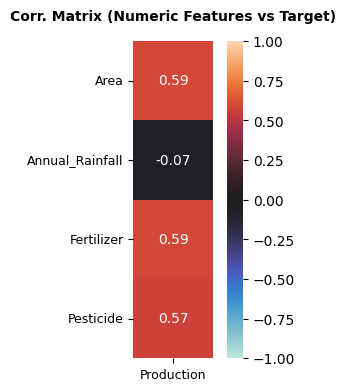

In [ ]:
# define Axes
_, ax = plt.subplots(figsize=(3.8,3.8), layout='constrained')

# plot heatmap using last column as a DataFrame (notice square brackets)
sns.heatmap(data=corr_matrix[['Production']],
            vmin=-1, vmax=1, annot=True, center=0, square=True,
            cmap='icefire', fmt='.2f', ax=ax)

# ticks, title
ax.tick_params(axis='both', labelrotation=0,
               labelsize=9)
ax.set_title('Corr. Matrix (Numeric Features vs Target)',
             fontsize=10, weight='black', pad=15)

plt.show()

> 📈 **Insight**

> From the correlation matrix, it is evident that
+ `Area`, `Fertilizer` and `Pesticide` have a moderate +ve correlation to the target, `Production`
+ `Annual_Rainfall` has no linear relationship with `Production`, hence will not be included during modelling

###### Plot scatter plot of numeric features vs `Production`
> For the fun of it, let's visualize this correlation on a scatter plot
+ A [`seaborn`](https://seaborn.pydata.org/index.html) [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) is a useful tool for plotting a `scatterplot` alongside a linear regression / least squares line that best fits the data

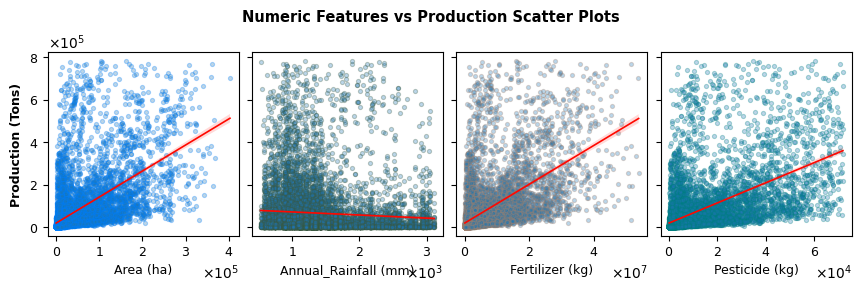

In [ ]:
# colors & untis
colors = ['#007fff', '#3a5a40', '#9f8170', '#008080']
units = ['(ha)', '(mm)', '(kg)', '(kg)']

# specify figure & Axes
fig, axs = plt.subplots(1, 4, figsize=(8.5,2.8), sharey=True,
                        layout='constrained')

# loop through each numerical column
for i, col in enumerate(num_cols):
  # plot
  sns.regplot(data=remove_df_outliers(crops), x=col, y='Production',
              line_kws={'color':'#ff0800', 'linewidth':1.2},
              scatter_kws={'edgecolors':colors[i],
                          'linewidths':0.8, 'alpha':0.3},
              marker='.', ax=axs[i])

  # ticks (10^a), axis labels
  axs[i].tick_params(axis='both', labelsize=9)
  axs[i].ticklabel_format(axis='both', style='sci', scilimits=(0,0),
                      useMathText=True)
  if i != 0:
    axs[i].set_ylabel('')
  else:
    axs[0].set_ylabel('Production (Tons)', weight='black', fontsize=9)

  axs[i].set_xlabel(f'{col} {units[i]}', fontsize=9)

# figure title
fig.suptitle('Numeric Features vs Production Scatter Plots',
             fontsize=10.5, weight='black')
plt.show()

> 📈 **Insight**

> As previously seen from the correlation matrix, the graph between crop `Production` and `Annual_Rainfall` shows very weak linear association.
+ `Annual_Rainfall` will be excluded in the subsequent notebook during modelling

#### Categorical features & target
> A [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) is a popular choice in visualizing relationship between _categorical features_ and a _numeric target_

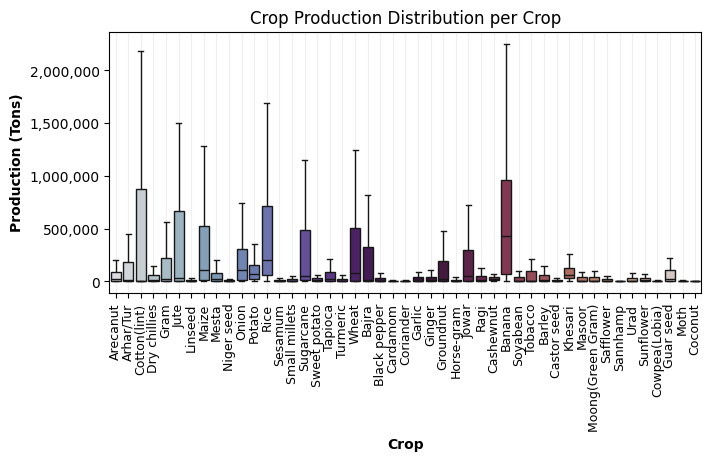

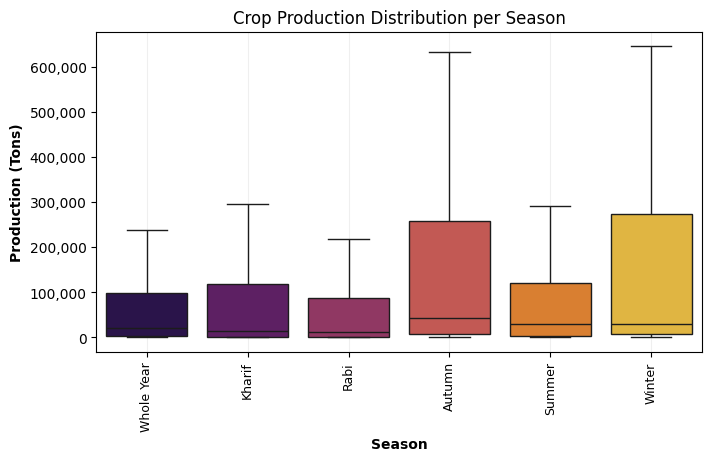

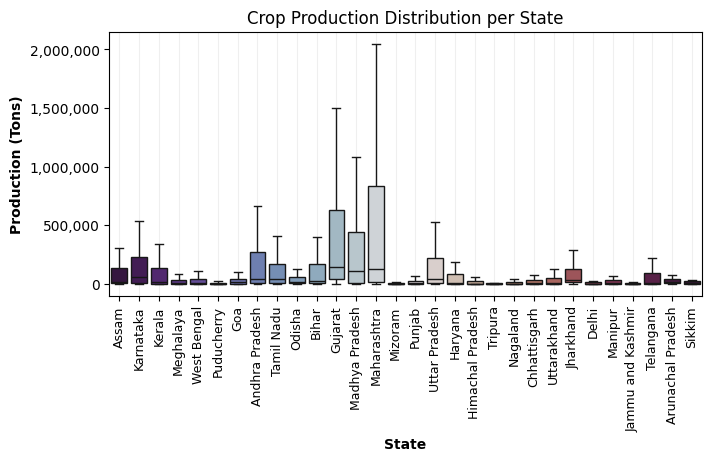

In [ ]:
#       ['Crop', 'Season', 'State']
palettes = ['twilight', 'inferno', 'twilight_shifted']

# loop through each categorical column
for i, col in enumerate(cat_cols):
  # specify Axes
  _, ax = plt.subplots(figsize=(7,4.5), layout='constrained')

  # plot
  sns.boxplot(data=remove_outliers(crops, 'Production'),
              y='Production', x=col, hue=col,
              palette=palettes[i], showfliers=False, ax=ax)

  # yaxis to have after 10^3 for ticks
  ax.yaxis.set_major_formatter(matplotlib.ticker\
              .FuncFormatter(lambda x, p: format(int(x), ',')))

  # grid, axis labels, ticks
  ax.grid(axis='x', alpha=0.2)
  ax.set_title(f'Crop Production Distribution per {col}')
  ax.set_ylabel('Production (Tons)', weight='black')
  ax.set_xlabel(f'{col}', weight='black')
  ax.tick_params(axis='x', labelsize=9, labelrotation=90)

  plt.show()
  print('\n')

> 📈 **Insight**

> From the `boxplots` there are evidently different values of `Production` (medians, ranges, spread) for the categorical columns `State`, `Season` & `Crop`  
+ This indicates that the distribution of the target variable varies significantly across the categories, suggesting that the categorical features have some influence and predictive power / information on the target variable.

> 📝 **Conclusion**

> Major inferences drawn from the Exploratory Data Analysis (EDA) phase
+ Significant varying distribution of `Production` across all categorical features (as illustrated by the `boxplots`) indicate that all categorical features are highly discriminative
+ Also, there's moderate correlation between all numeric columns and the target except `Annual_Rainfall` which has weak linear relationship with `Production`
+ All numeric columns in the dataset do not follow a normal distribution, but we'll train an [`xgboost`](xgboost.readthedocs.io) model, that's robust to such data distributions
+ In conclusion, the following features are most predictive of the target: `Crop`, `Season`, `State`, `Area`, `Fertilizer`, `Pesticide`, and will be used for modelling

> ▶️ **Up Next**
+ Up next comes the fun part, _modelling!_ 🎊